In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as ss

import msyexp.datasets as ds
import msyexp.xytools as xytools
import msyexp.plotfuncs as pf
import msyexp.diffexp as yd
import msyexp.general as general

%matplotlib inline

In [3]:
outdir = '{}/coexpression'.format(ds.paths.NBOUTDIR)
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [4]:
data = ds.get_gtex_data(males_only=True, adjusted=True)
meta = ds.get_metadata()
meta_ = meta.set_index('SAMPID')

Limit analyses to tissues with at least 30 samples (which is all but Kidney)

In [5]:
tcounts = meta_.loc[data.columns, 'TISSUE'].value_counts()
tissues = tcounts.index[tcounts >= 30]
print(len(tissues))

35


This will take a few minutes...

In [6]:
res, data_r = yd.analyze_coexpression(data, meta, xgenes=xytools.XYPAIRS_X13, 
                                      ygenes=xytools.XYPAIRS_Y13, median_thresh=1)

Skeletal Muscle [1/35]...
Skin [2/35]...
Artery - Tibial [3/35]...
Adipose - Subcutaneous [4/35]...
Lung [5/35]...
Nerve [6/35]...
Thyroid [7/35]...
Esophagus - Mucosa [8/35]...
Esophagus - Muscularis [9/35]...
Adipose - Visceral [10/35]...
Artery - Aorta [11/35]...
Testis [12/35]...
Heart - Atrial Appendage [13/35]...
Heart - Left Ventricle [14/35]...
Brain - Cortex [15/35]...
Brain - Cerebellum [16/35]...
Pancreas [17/35]...
Brain - Striatum [18/35]...
Prostate [19/35]...
Artery - Coronary [20/35]...
Pituitary [21/35]...
Colon - Sigmoid [22/35]...
Adrenal Gland [23/35]...
Stomach [24/35]...
Brain - Hypothalamus [25/35]...
Liver [26/35]...
Colon - Transverse [27/35]...
Spleen [28/35]...
Brain - Hippocampus [29/35]...
Brain - Amygdala [30/35]...
Small Intestine [31/35]...
Spinal Cord [32/35]...
Breast [33/35]...
Salivary Gland [34/35]...
Brain - Substantia nigra [35/35]...


In [7]:
res

,pair,X_homolog,Y_homolog,tissue,spearman_r,spearman_p,rank_X(Y),rank_Y(X),avg_rank
0,DDX3X/DDX3Y,DDX3X,DDX3Y,Skeletal Muscle,0.684296,1.457598e-36,9.0,5.0,0.000594
1,EIF1AX/EIF1AY,EIF1AX,EIF1AY,Skeletal Muscle,0.075769,2.279223e-01,5308.0,2669.0,0.338209
2,KDM5C/KDM5D,KDM5C,KDM5D,Skeletal Muscle,0.349569,9.650652e-09,477.0,190.0,0.028279
3,PRKX/PRKY,PRKX,PRKY,Skeletal Muscle,0.503399,8.669396e-18,72.0,6.0,0.003307
4,RPS4X/RPS4Y1,RPS4X,RPS4Y1,Skeletal Muscle,0.785041,1.515409e-54,8.0,8.0,0.000678
...,...,...,...,...,...,...,...,...,...
354,TMSB4X/TMSB4Y,TMSB4X,TMSB4Y,Brain - Substantia nigra,0.302419,9.250456e-02,2172.0,3178.0,0.190391
355,TXLNG/TXLNGY,TXLNG,TXLNGY,Brain - Substantia nigra,0.169721,3.530690e-01,6646.5,6243.0,0.458701
356,USP9X/USP9Y,USP9X,USP9Y,Brain - Substantia nigra,0.366202,3.926889e-02,3168.0,1710.5,0.173612
357,KDM6A/UTY,KDM6A,UTY,Brain - Substantia nigra,0.564150,7.710814e-04,318.5,434.0,0.026779


Save table of results

In [8]:
res.to_csv("{}/xycoexpression.txt".format(outdir), sep='\t', index=False)

Create pivot tables with correlation coefficients and average ranks for heatmap plotting

In [9]:
res_r = pd.pivot(res, index='pair', columns='tissue', values='spearman_r')

# tissue order
t_order = list(filter(lambda t: t in res_r.columns, pf.TISSUE_ORDER))
# pair order like Y/X ratio plot
p_order = ['TXLNG/TXLNGY', 'NLGN4X/NLGN4Y', 'PCDH11X/PCDH11Y',
           'EIF1AX/EIF1AY', 'KDM5C/KDM5D',
           'KDM6A/UTY', 'PRKX/PRKY', 'ZFX/ZFY',
           'DDX3X/DDX3Y', 'USP9X/USP9Y', 'RPS4X/RPS4Y1',
           'TBL1X/TBL1Y', 'TMSB4X/TMSB4Y'][::-1]

res_r = res_r.reindex(t_order, axis=1)
res_r = res_r.reindex(p_order, axis=0)

res_p = pd.pivot(res, index='pair', columns='tissue', values='avg_rank')
res_p = res_p.reindex(res_r.columns, axis=1)
res_p = res_p.reindex(res_r.index, axis=0)

res_r

tissue,Thyroid,Prostate,Salivary Gland,Small Intestine,Colon - Transverse,Stomach,Skin,Esophagus - Mucosa,Pancreas,Adipose - Visceral,...,Brain - Hippocampus,Brain - Amygdala,Brain - Striatum,Brain - Hypothalamus,Brain - Substantia nigra,Brain - Cortex,Spinal Cord,Brain - Cerebellum,Pituitary,Testis
pair,,,,,,,,,,,,,,,,,,,,,
TMSB4X/TMSB4Y,-0.085888,-0.119950,-0.150140,0.267542,0.142359,NaN,0.286983,-0.007954,NaN,NaN,...,0.506417,0.576534,0.202213,0.309413,0.302419,0.312301,-0.153846,0.187530,-0.303576,0.114159
TBL1X/TBL1Y,0.595547,NaN,0.357703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RPS4X/RPS4Y1,0.686008,0.561868,0.073389,0.657411,0.559863,0.541235,0.461189,0.463058,0.389851,0.680884,...,0.674034,0.694352,0.663773,0.425383,0.585411,0.529423,0.576923,0.624447,0.402945,0.552007
USP9X/USP9Y,0.523913,0.719242,0.755462,0.301501,0.566684,0.462366,0.453899,0.567780,0.499165,0.533835,...,0.681294,0.621425,0.498859,0.582179,0.366202,0.627105,0.638837,0.590190,0.584444,0.449615
DDX3X/DDX3Y,0.728251,0.657427,0.622689,0.483302,0.507509,0.653043,0.664025,0.409648,0.548323,0.713692,...,0.531825,0.310105,0.629894,0.572977,0.444648,0.445253,0.600375,0.655885,0.724838,0.645002
ZFX/ZFY,0.728820,0.198919,0.785714,0.806567,0.799736,0.716099,0.778041,0.768993,0.581216,0.728186,...,0.874449,0.835021,0.798604,0.781967,0.706378,0.750833,0.612383,0.724717,0.654522,0.118052
PRKX/PRKY,-0.013526,0.614561,0.369748,0.327205,0.185193,0.601168,0.308030,0.640031,0.211376,0.441055,...,0.431164,0.024228,0.268761,0.247858,-0.152126,0.399872,0.216698,0.209619,NaN,NaN
KDM6A/UTY,0.720683,0.556444,0.677311,0.449156,0.755526,0.355544,0.720585,0.692404,0.563864,0.753738,...,0.638190,0.652540,0.587028,0.600053,0.564150,0.447676,0.421201,0.434862,0.394844,0.461736
KDM5C/KDM5D,0.360555,0.360132,0.125490,0.316135,0.225436,0.474050,0.417229,0.475675,0.513174,0.255731,...,0.434729,0.417227,0.402945,0.205500,0.367302,0.178276,0.358724,0.267781,0.357930,0.341685


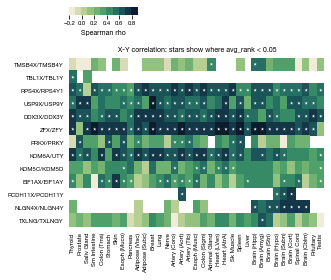

In [10]:
palette = sns.cubehelix_palette(11, light=0.92, start=-0.1, rot=-0.55, dark=0.1,
                                hue=1, gamma=1)
# sns.palplot(palette)

#fig, ax = plt.subplots(figsize=(5, 4))
fig = plt.figure(figsize=(5, 4))
left=0.167
right=0.876
bottom=0.158
top=0.744
ax = fig.add_axes([left, bottom, (right-left), (top-bottom)])
ax_cbar = fig.add_axes([left, top+0.15, 0.1912, 0.0275])

ax = sns.heatmap(res_r, cmap=palette, ax=ax, vmin=-0.2, vmax=0.9, cbar_ax=ax_cbar,
                 cbar_kws={'label':'Spearman rho', 'orientation':'horizontal'})
ylim = ax.get_ylim()
ax.set_ylim(np.ceil(ylim[0]), np.floor(ylim[1]))

_xs = []
_ys = []
for i in range(res_p.shape[1]):
    for j in range(res_p.shape[0]):
        if res_p.iat[j, i] < 0.05:
            _xs.append(i)
            _ys.append(j)
ax.scatter(np.array(_xs)+0.5, np.array(_ys)+0.5, marker='*',
           edgecolor='none', facecolor='w',
           s=12)

ax.set_title("X-Y correlation: stars show where avg_rank < 0.05")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks(np.arange(res_r.shape[1])+0.5)
ax.set_xticklabels(res_r.columns)
ax.tick_params(axis='both', left=False, bottom=False)
ax = pf.simplify_tissues(ax, 'x')
ax = pf.format_axis_labels(ax)
ax_cbar = pf.format_axis_labels(ax_cbar)

fig.savefig("{}/xycorrelation_tissue_heatmap.pdf".format(outdir))

### Plot co-expression of individual genes

Choose a couple of tissues for plotting; choose tissues that are relatively distinct and where few genes are not expressed. 

Cluster tissues to identify relationships

In [11]:
mbt = general.stat_by_tissue(data, meta)
mbt_g1 = mbt.loc[mbt.gt(1).any(axis=1)]

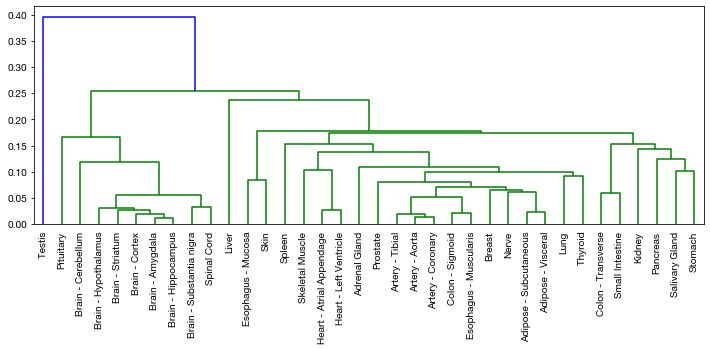

In [12]:
link = sch.linkage(np.log2(mbt_g1.T+0.5), method='average', metric='correlation')

fig, ax = plt.subplots(figsize=(12, 4))
dend = sch.dendrogram(link, labels=mbt.columns, leaf_rotation='vertical', ax=ax, 
                      leaf_font_size='medium')

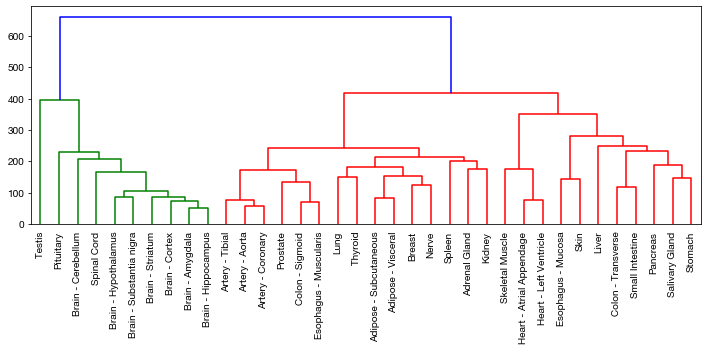

In [13]:
link = sch.linkage(np.log2(mbt_g1.T+0.5), method='ward')

fig, ax = plt.subplots(figsize=(12, 4))
dend = sch.dendrogram(link, labels=mbt.columns, leaf_rotation='vertical', ax=ax, 
                      leaf_font_size='medium')

In [14]:
tcounts_r = res_r.notnull().sum(axis=0).sort_values(ascending=False)
tcounts_r

tissue
Thyroid                     12
Brain - Cortex              12
Brain - Substantia nigra    12
Brain - Hypothalamus        12
Colon - Sigmoid             11
Salivary Gland              11
Nerve                       11
Artery - Coronary           11
Artery - Aorta              11
Esophagus - Muscularis      11
Brain - Striatum            11
Brain - Cerebellum          11
Brain - Hippocampus         11
Spinal Cord                 11
Brain - Amygdala            11
Lung                        10
Adipose - Visceral          10
Adipose - Subcutaneous      10
Breast                      10
Spleen                      10
Artery - Tibial             10
Esophagus - Mucosa          10
Colon - Transverse          10
Small Intestine             10
Prostate                    10
Skin                        10
Stomach                      9
Testis                       9
Pancreas                     9
Pituitary                    9
Adrenal Gland                9
Heart - Left Ventricle       9
H

In [16]:
def plot_xyscatter_onegene_onetissue(data, meta, gene1, gene2, t, ax=None,
                                     square_axes=True, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    else:
        fig = ax.get_figure()
    meta_ = meta.set_index('SAMPID')
    
    dt = data.loc[:, meta_.loc[data.columns, 'TISSUE']==t]
    
    kwarg_defaults = {'edgecolors':'none',
                      'facecolors':'k',
                      'alpha':0.6,
                      's':20}
    for k in kwarg_defaults:
        if not k in kwargs:
            kwargs[k] = kwarg_defaults[k]
    
    ax.scatter(dt.loc[gene1], dt.loc[gene2], **kwargs)

    ax.set_xlabel('{} standardized expression'.format(gene1))
    ax.set_ylabel('{} standardized expression'.format(gene2))

    if square_axes:
        lim = pf.square_axes(ax)
    return fig, ax

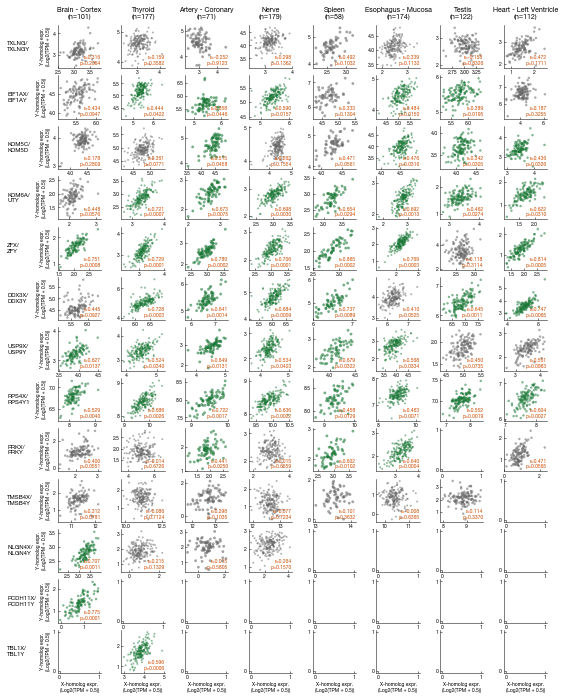

In [17]:
tissues_plot = ['Thyroid', 
                'Esophagus - Mucosa',      # mucosa
                'Nerve',
                'Artery - Coronary',       # smooth muscle
                'Heart - Left Ventricle',  # striated muscle
                'Spleen',
                'Brain - Cortex',          # brain
                'Testis']

xypairs = ['TXLNG/TXLNGY', 'NLGN4X/NLGN4Y', 'PCDH11X/PCDH11Y',
           'EIF1AX/EIF1AY', 'KDM5C/KDM5D',
           'KDM6A/UTY', 'PRKX/PRKY', 'ZFX/ZFY',
           'DDX3X/DDX3Y', 'USP9X/USP9Y', 'RPS4X/RPS4Y1',
           'TBL1X/TBL1Y', 'TMSB4X/TMSB4Y'][::-1]

tcounts = meta_.loc[data_r.columns, 'TISSUE'].value_counts()

ncol = len(tissues_plot)
nrow = len(xypairs)

# sort by number of non-null entries
_p_count = res_p.loc[xypairs, tissues_plot].notnull().sum(axis=1)
_t_count = res_p.loc[xypairs, tissues_plot].notnull().sum(axis=0)
xypairs = list(_p_count.sort_values(ascending=False).index)
tissues_plot = list(_t_count.sort_values(ascending=False).index)

fig_w_in = 8.5
fig_h_in = 11
marg_t_in = 1
marg_b_in = 1
marg_l_in = 1.2
marg_r_in = 0.5
ax_dim_in = 0.6
if (fig_w_in - ncol * ax_dim_in) < 0:
    raise ValueError("cannot fit {0} plots of size {1:.2f} horizontally".format(ncol, ax_dim_in))
if (fig_h_in - nrow * ax_dim_in) < 0:
    raise ValueError("cannot fit {0} plots of size {1:.2f} vertically".format(nrow, ax_dim_in))

left0 = marg_l_in / fig_w_in
bottom0 = 1 - ((marg_t_in + ax_dim_in) / fig_h_in)
ax_dim_w = ax_dim_in / fig_w_in
ax_dim_h = ax_dim_in / fig_h_in
pad_w_total = (fig_w_in - marg_l_in - marg_r_in - ncol * ax_dim_in) / fig_w_in
pad_h_total = (fig_h_in - marg_t_in - marg_b_in - nrow * ax_dim_in) / fig_h_in
pad_w = pad_w_total / (ncol - 1)
pad_h = pad_h_total / (nrow - 1)

fig = plt.figure(figsize=(fig_w_in, fig_h_in))
axes = np.empty((nrow, ncol), dtype=object)
for i in range(nrow):
    bottom = bottom0 - i * (ax_dim_h + pad_h)
    for j in range(ncol):
        left = left0 + j * (ax_dim_w + pad_w)
        axes[i, j] = fig.add_axes([left, bottom, ax_dim_w, ax_dim_h])
    
# annotate gene pair name
for i, pair in enumerate(xypairs):
    _y = bottom0 - i * (ax_dim_h + pad_h) + 0.5 * ax_dim_h
    _x = 0.5 / fig_w_in # hard-code at 0.5 inches on the left
    gx, gy = pair.split('/')
    plt.figtext(_x, _y, "{0}/\n{1}".format(gx, gy), 
                size=6, horizontalalignment='left',
                verticalalignment='center')
    

for i, pair in enumerate(xypairs):
    gx, gy = pair.split('/')
    for j, t in enumerate(tissues_plot):
        _xvals = data_r.loc[gx, meta_.loc[data_r.columns, 'TISSUE']==t]
        _yvals = data_r.loc[gy, meta_.loc[data_r.columns, 'TISSUE']==t]
        if res_p.at[pair, t] < 0.05:
            color = '#1b7837'
        else:
            color = '0.4'
        if tcounts[t] > 150:
            s = 4
            alpha=0.5
        elif tcounts[t] > 100:
            s = 6
            alpha = 0.55
        else:
            s = 8
            alpha = 0.6
        
        fig, ax = plot_xyscatter_onegene_onetissue(data_r, meta, gx, gy, t,
                                                   ax=axes[i, j], square_axes=False,
                                                   s=s, alpha=alpha, facecolors=color)
        # annotate
        rho = res_r.at[pair, t]
        pval = res_p.at[pair, t]
        aloc = 'bottom left'  # {'top right', 'bottom left'}
        if (not np.isnan(rho)) and (not np.isnan(pval)):
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            xrng = xlim[1] - xlim[0]
            yrng = ylim[1] - ylim[0]
            pad = 0.05
            if aloc == 'top left':
                _x = xlim[0] + xrng * pad
                _y = ylim[1] - yrng * pad
                ha = 'left'
                va = 'top'
            else:
                # bottom right
                _x = xlim[1]
                _y = ylim[0] + yrng * pad
                ha = 'right'
                va = 'bottom'
            ax.text(_x, _y, 'r={0:.3f}\np={1:.4f}'.format(rho, pval),
                    color='#cc4c02', size=5, horizontalalignment=ha,
                    verticalalignment=va)
        
        # tissue title
        if i == 0:
            ax.set_title("{0}\n(n={1})".format(t, tcounts[t]))
        
        # y-axis label
        if j == 0:
            ax.set_ylabel("Y-homolog expr.\n(Log2(TPM + 0.5))", 
                          labelpad=2)
        else:
            ax.set_ylabel('')
        
        # x-axis label
        if i == (len(xypairs) - 1):
            ax.set_xlabel('X-homolog expr.\n(Log2(TPM + 0.5))', 
                          labelpad=2)
        else:
            ax.set_xlabel('')
        
        ax.tick_params(axis='both', direction='in', length=1)
        
        ax = pf.format_spines(ax)
        ax = pf.format_axis_labels(ax, ticklabsize=5, labsize=5)
        #lim = pf.square_axes(ax)
        
fig.savefig("{}/xycorrelation_grid.pdf".format(outdir))

### Plot detail for RPS4X/Y and ZFX/Y

In [18]:
data_r2 = 2**data_r - 0.5

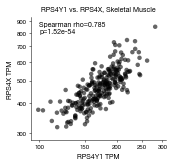

In [19]:
gene2 = 'RPS4X'

fig, ax = plot_xyscatter_onegene_onetissue(data_r2, meta, 'RPS4Y1', gene2, 
                                           'Skeletal Muscle', square_axes=False)
dt_r = data_r2.loc[:, meta_.loc[data_r2.columns, 'TISSUE']=='Skeletal Muscle']

ax.set_xscale('log')
ax.set_yscale('log')

# exclude one outlying point, which is the maximum for both X and Y homologs
assert dt_r.loc['RPS4X'].idxmax() == dt_r.loc['RPS4Y1'].idxmax()
ax.set_xlim([93, 310])
ax.set_ylim([280, 930])

xticks = np.arange(100, 350, 50)
yticks = np.arange(300, 1000, 100)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

ax.set_xlabel('RPS4Y1 TPM')
ax.set_ylabel('{} TPM'.format(gene2))
ax.set_title("RPS4Y1 vs. {}, Skeletal Muscle".format(gene2))

r, p = ss.spearmanr(dt_r.loc[gene2], dt_r.loc['RPS4Y1'])
ax.text(100, 900, 'Spearman rho={0:.3f}\np={1:.2e}'.format(r, p), size=7,
        horizontalalignment='left', verticalalignment='top')

fig.set_figheight(2.5)
fig.set_figwidth(2.5)
fig.subplots_adjust(left=0.15, bottom=0.2)
ax = pf.format_spines(ax)
ax = pf.format_axis_labels(ax)

fig.savefig("{}/RPS4Y_RPS4X.skeletal_muscle.pdf".format(outdir))

Print coordinates of excluded point

In [20]:
print(dt_r.loc['RPS4X'].max())
print(dt_r.loc['RPS4Y1'].max())

1256.3948818152132
423.3200463634227


In [21]:
print(dt_r.loc['RPS4X'].idxmax())
print(dt_r.loc['RPS4Y1'].idxmax())

GTEX-Y8E5-0326-SM-57WBM
GTEX-Y8E5-0326-SM-57WBM


#### RPS4Y1 vs. RPS8 (chr1)

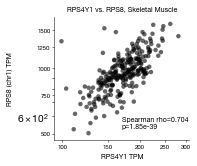

In [22]:
gene2 = 'RPS8'

dt_r = data_r2.loc[:, meta_.loc[data_r2.columns, 'TISSUE']=='Skeletal Muscle']

# exclude one outlying point, which is the maximum for both X and Y homologs
assert dt_r.loc[gene2].idxmax() == dt_r.loc['RPS4Y1'].idxmax()
data_r2_ = data_r2.loc[:, data_r2.columns != 'GTEX-Y8E5-0326-SM-57WBM'].copy()

fig, ax = plot_xyscatter_onegene_onetissue(data_r2_, meta, 'RPS4Y1', gene2, 
                                           'Skeletal Muscle', square_axes=False)

ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlim([93, 310])
ax.set_ylim([468, 1720])

xticks = np.arange(100, 350, 50)
yticks = np.arange(500, 1750, 250)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

ax.set_xlabel('RPS4Y1 TPM')
ax.set_ylabel('{} (chr1) TPM'.format(gene2))
ax.set_title("RPS4Y1 vs. {}, Skeletal Muscle".format(gene2))

r, p = ss.spearmanr(dt_r.loc[gene2], dt_r.loc['RPS4Y1'])
ax.text(170, 600, 'Spearman rho={0:.3f}\np={1:.2e}'.format(r, p), size=7,
        horizontalalignment='left', verticalalignment='top')

fig.set_figheight(2.5)
fig.set_figwidth(2.5)
fig.subplots_adjust(left=0.15, bottom=0.2)
ax = pf.format_spines(ax)
ax = pf.format_axis_labels(ax)
fig.savefig("{0}/RPS4Y_{1}.skeletal_muscle.pdf".format(outdir, gene2))

In [23]:
dt_r_ = data_r2_.loc[:, meta_.loc[data_r2_.columns, 'TISSUE']=='Skeletal Muscle']
print(dt_r_.loc['RPS8'].min())
print(dt_r_.loc['RPS8'].max())

502.187186909755
1605.2528154547517


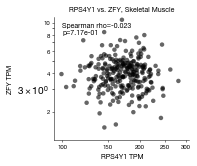

In [24]:
gene2 = 'ZFY'

dt_r = data_r2.loc[:, meta_.loc[data_r2.columns, 'TISSUE']=='Skeletal Muscle']

data_r2_ = data_r2.loc[:, data_r2.columns != 'GTEX-Y8E5-0326-SM-57WBM'].copy()

fig, ax = plot_xyscatter_onegene_onetissue(data_r2_, meta, 'RPS4Y1', gene2, 
                                           'Skeletal Muscle', square_axes=False)

ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlim([93, 310])
ax.set_ylim([1.2, 11])

xticks = np.arange(100, 350, 50)
yticks = np.arange(2, 11, 2)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

ax.set_xlabel('RPS4Y1 TPM')
ax.set_ylabel('{} TPM'.format(gene2))
ax.set_title("RPS4Y1 vs. {}, Skeletal Muscle".format(gene2))

r, p = ss.spearmanr(dt_r.loc[gene2], dt_r.loc['RPS4Y1'])
ax.text(100, 10, 'Spearman rho={0:.3f}\np={1:.2e}'.format(r, p), size=7,
        horizontalalignment='left', verticalalignment='top')

fig.set_figheight(2.5)
fig.set_figwidth(2.5)
fig.subplots_adjust(left=0.15, bottom=0.2)
ax = pf.format_spines(ax)
ax = pf.format_axis_labels(ax)
fig.savefig("{0}/RPS4Y_{1}.skeletal_muscle.pdf".format(outdir, gene2))

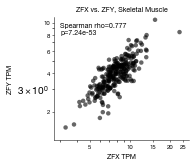

In [25]:
gene2 = 'ZFY'

dt_r = data_r2.loc[:, meta_.loc[data_r2.columns, 'TISSUE']=='Skeletal Muscle']

data_r2_ = data_r2.loc[:, data_r2.columns != 'GTEX-Y8E5-0326-SM-57WBM'].copy()

fig, ax = plot_xyscatter_onegene_onetissue(data_r2_, meta, 'ZFX', gene2, 
                                           'Skeletal Muscle', square_axes=False)

ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlim([2.7, 28])
ax.set_ylim([1.2, 11])

xticks = np.arange(5, 30, 5)
yticks = np.arange(2, 11, 2)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

ax.set_xlabel('ZFX TPM')
ax.set_ylabel('{} TPM'.format(gene2))
ax.set_title("ZFX vs. {}, Skeletal Muscle".format(gene2))

r, p = ss.spearmanr(dt_r.loc[gene2], dt_r.loc['ZFX'])
ax.text(3, 10, 'Spearman rho={0:.3f}\np={1:.2e}'.format(r, p), size=7,
        horizontalalignment='left', verticalalignment='top')

fig.set_figheight(2.5)
fig.set_figwidth(2.5)
fig.subplots_adjust(left=0.15, bottom=0.2)
ax = pf.format_spines(ax)
ax = pf.format_axis_labels(ax)
fig.savefig("{0}/ZFX_{1}.skeletal_muscle.pdf".format(outdir, gene2))